Importing libraries

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, BatchNormalization , Dropout
from tensorflow.keras.models import Sequential
import zipfile
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping

Downloading Dataset

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle. json ~/ kaggle/

cp: target 'kaggle/' is not a directory


In [6]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 145M/149M [00:10<00:00, 19.5MB/s]
100% 149M/149M [00:10<00:00, 14.3MB/s]


Zipfile Extraction

In [7]:
zp = zipfile.ZipFile('/content/brain-tumor-mri-dataset.zip')
zp.extractall('/content')
zp.close()

Data Prepration

In [10]:
train = keras.utils.image_dataset_from_directory(
    directory = '/content/Training',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)
test = keras.utils.image_dataset_from_directory(
    directory = '/content/Testing',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)
def process(image , label):
  image = tf.cast(image/255., tf.float32)
  return image , label
train = train.map(process)
test = test.map(process)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


Model Architecture

In [11]:
tl = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape = (256,256,3)
)

model = Sequential()
model.add(tl)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))
tl.trainable = False
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model Training

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train,epochs=10, validation_data = test, callbacks=[early_stopping])

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 95s 412ms/step - accuracy: 0.7378 - loss: 1.0656 - val_accuracy: 0.8963 - val_loss: 0.2860
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 226ms/step - accuracy: 0.9214 - loss: 0.2112 - val_accuracy: 0.9497 - val_loss: 0.1409
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 230ms/step - accuracy: 0.9544 - loss: 0.1229 - val_accuracy: 0.9481 - val_loss: 0.1447
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 229ms/step - accuracy: 0.9769 - loss: 0.0662 - val_accuracy: 0.9649 - val_loss: 0.0903
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 223ms/step - accuracy: 0.9812 - loss: 0.0545 - val_accuracy: 0.9512 - val_loss: 0.1386
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 211ms/step - accuracy: 0.9858 - loss: 0.0429 - val_accuracy: 0.9619 - val_loss: 0.0970
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 229ms/step - accuracy: 0.9911 - loss: 0.0265 - val_accuracy: 0.9756 - val_loss: 0.0687
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 211ms/step - accuracy: 0.9964 - loss: 0

Model Summary

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,981,518 (152.52 MB)

 Trainable params: 8,422,276 (32.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 16,844,554 (64.26 MB)

Loss vs Val_loss Graph

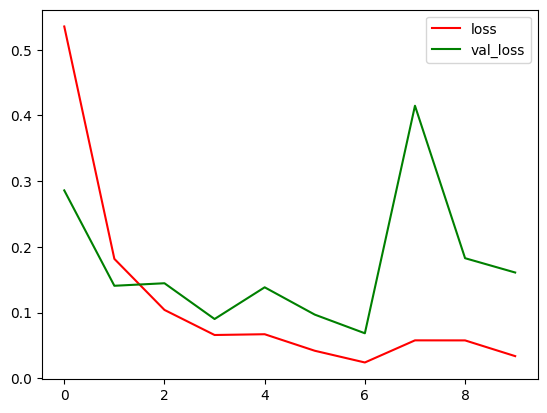

In [15]:
plt.plot(history.history['loss'],label='loss',color='red')
plt.plot(history.history['val_loss'],label='val_loss',color='green')
plt.legend()
plt.show()

Accuracy vs Val_accuracy graph

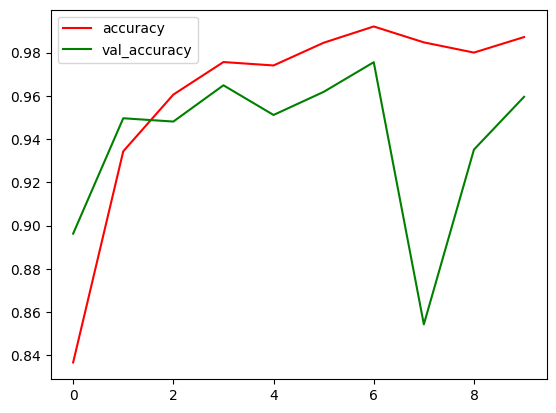

In [16]:
plt.plot(history.history['accuracy'],label='accuracy',color='red')
plt.plot(history.history['val_accuracy'],label='val_accuracy',color='green')
plt.legend()
plt.show()

Model Testing

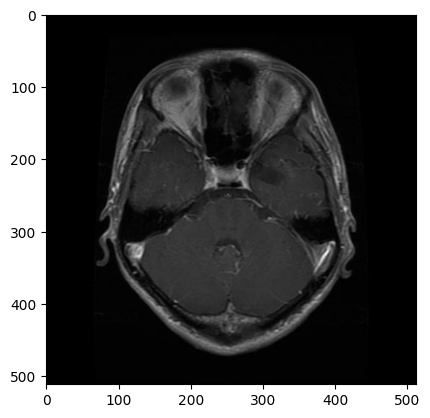

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: glioma


In [20]:
import cv2
class_labels = {0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}

img1 = cv2.imread('/content/Testing/glioma/Te-glTr_0001.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()


img1 = cv2.resize(img1, (256, 256))
img1 = img1.reshape((1, 256, 256, 3))
img1 = img1 / 255.0


prediction = model.predict(img1)


predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]
print("Predicted Class:", predicted_class_label)


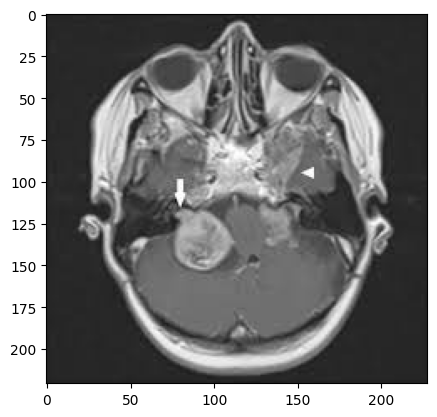

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class: pituitary


In [22]:

img1 = cv2.imread('/content/Testing/meningioma/Te-meTr_0002.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()


img1 = cv2.resize(img1, (256, 256))
img1 = img1.reshape((1, 256, 256, 3))
img1 = img1 / 255.0





prediction = model.predict(img1)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]
print("Predicted Class:", predicted_class_label)


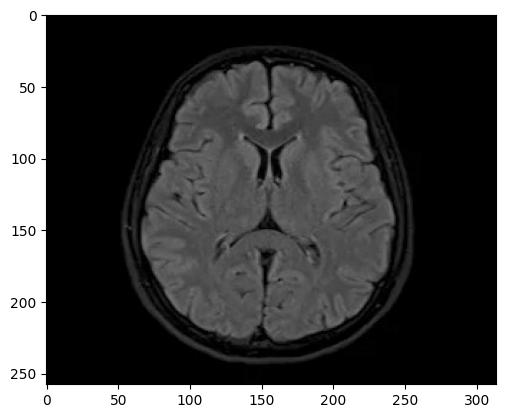

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class: notumor


In [23]:
img1 = cv2.imread('/content/Testing/notumor/Te-noTr_0002.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

img1 = cv2.resize(img1, (256, 256))
img1 = img1.reshape((1, 256, 256, 3))
img1 = img1 / 255.0


prediction = model.predict(img1)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]
print("Predicted Class:", predicted_class_label)


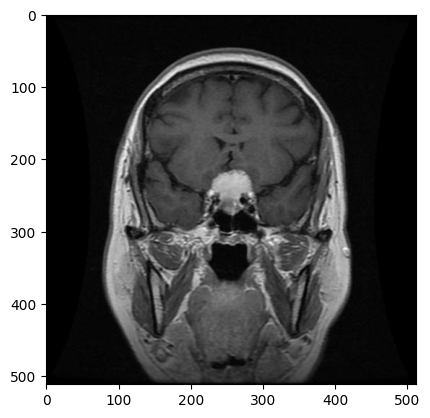

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: meningioma


In [24]:
img1 = cv2.imread('/content/Testing/pituitary/Te-piTr_0002.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

img1 = cv2.resize(img1, (256, 256))
img1 = img1.reshape((1, 256, 256, 3))
img1 = img1 / 255.0

prediction = model.predict(img1)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]
print("Predicted Class:", predicted_class_label)


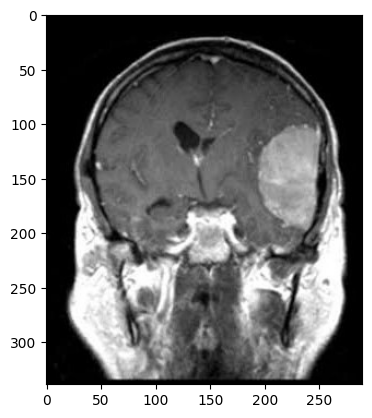

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class: meningioma


In [25]:
img1 = cv2.imread('/content/Testing/meningioma/Te-me_0016.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()


img1 = cv2.resize(img1, (256, 256))
img1 = img1.reshape((1, 256, 256, 3))
img1 = img1 / 255.0



prediction = model.predict(img1)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]
print("Predicted Class:", predicted_class_label)


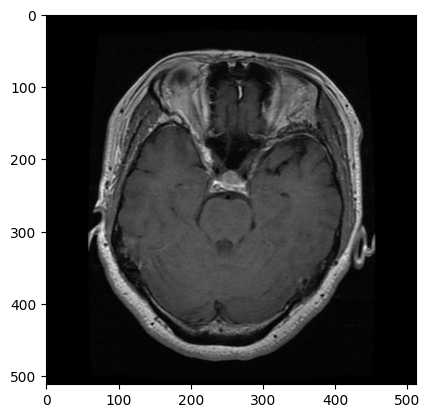

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Class: pituitary


In [26]:
img1 = cv2.imread('/content/Testing/pituitary/Te-pi_0023.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

img1 = cv2.resize(img1, (256, 256))
img1 = img1.reshape((1, 256, 256, 3))
img1 = img1 / 255.0

prediction = model.predict(img1)
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]
print("Predicted Class:", predicted_class_label)


Model dumping

In [28]:
from google.colab import files
from tensorflow.keras.models import load_model
model.save('my_model.h5')
